### Step 1: Setup and Data Loading

In [ ]:

import sys
import os

parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
if parent_dir not in sys.path:
    sys.path.append(parent_dir)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from src import data_loader, preprocessing, analysis


sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (14, 7)

TICKERS = ['TSLA', 'BND', 'SPY']
START_DATE = '2015-07-01'
END_DATE = '2025-07-31'

asset_data = data_loader.fetch_data(TICKERS, START_DATE, END_DATE)

if 'TSLA' in asset_data:
    print("\n--- TSLA Data Sample ---")
    display(asset_data['TSLA'].head()) 

d:\tenx\time_series_forecasting_w11\src\data_loader.py:21: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start=start_date, end=end_date)
[*********************100%***********************]  2 of 3 completed

1 Failed download:
['TSLA']: Timeout('Failed to perform, curl: (28) Operation timed out after 10003 milliseconds with 81419 bytes received. See https://curl.se/libcurl/c/libcurl-errors.html first for more details.')


Successfully fetched data for: ['TSLA', 'BND', 'SPY']

--- TSLA Data Sample ---


Price,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2015-07-01,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-02,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-06,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-07,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-08,NaN,NaN,NaN,NaN,NaN,NaN


[*********************100%***********************]  2 of 3 completed

##### Step 1.1: Basic Statistics

In [2]:
for ticker, df in asset_data.items():
    print(f'\n--- Basic Stats for {ticker} ---')
    display(df.describe())  


--- Basic Stats for TSLA ---


Price,Close,High,Low,Open,Volume
count,2535.000000,2535.000000,2535.000000,2535.000000,2.535000e+03
mean,131.963002,134.960429,128.837831,132.000600,1.141789e+08
std,120.914904,123.783736,117.996631,121.034152,7.332146e+07
min,9.578000,10.331333,9.403333,9.488000,1.062000e+07
25%,18.967667,19.279667,18.575334,18.901000,6.908220e+07
50%,94.571335,97.666664,91.734001,94.400665,9.537450e+07
75%,236.761665,240.881668,232.170006,235.851669,1.322551e+08
max,479.859985,488.540009,457.510010,475.899994,9.140820e+08



--- Basic Stats for BND ---


Price,Close,High,Low,Open,Volume
count,2535.000000,2535.000000,2535.000000,2535.000000,2.535000e+03
mean,68.469188,68.571174,68.364920,68.471392,4.434376e+06
std,4.554601,4.563590,4.544724,4.555994,2.899511e+06
min,60.779156,60.899439,60.764154,60.786675,0.000000e+00
25%,64.654350,64.731238,64.570652,64.660607,2.182050e+06
50%,67.604881,67.749353,67.474073,67.589050,4.121100e+06
75%,71.891144,72.018943,71.780688,71.886212,5.890100e+06
max,77.318253,77.413299,77.283688,77.378741,3.396300e+07



--- Basic Stats for SPY ---


Price,Close,High,Low,Open,Volume
count,2535.000000,2535.000000,2535.000000,2535.000000,2.535000e+03
mean,334.193730,335.981616,332.114633,334.125536,8.503521e+07
std,126.427705,127.053090,125.661287,126.391139,4.428796e+07
min,155.869858,156.926838,153.758441,155.426606,2.027000e+07
25%,230.083160,234.024878,228.661778,231.007795,5.779150e+07
50%,305.264404,306.143504,302.033069,304.715043,7.451530e+07
75%,420.350525,423.114882,417.754471,420.117451,9.789180e+07
max,637.099976,638.669983,635.539978,638.349976,5.072443e+08


#### Step 2: Data Cleaning, Feature Engineering, and Scaling

In [3]:
processed_data = {}

for ticker, df in asset_data.items():
    df_clean = preprocessing.clean_data(df.copy())
    df_returns = preprocessing.calculate_daily_returns(df_clean)
    df_rolling = preprocessing.calculate_rolling_metrics(df_returns, window=30)
    df_scaled = preprocessing.scale_data(df_rolling, column='Close')  
    processed_data[ticker] = df_scaled

print("\n--- TSLA Processed Data Sample ---")
display(processed_data['TSLA'].head())  # Now includes Daily_Return, Rolling_Mean_Price_30d, Rolling_Volatility_30d, Close_Scaled

Data cleaned successfully. Missing values handled.
Close scaled successfully using MinMaxScaler.
Data cleaned successfully. Missing values handled.
Close scaled successfully using MinMaxScaler.
Data cleaned successfully. Missing values handled.
Close scaled successfully using MinMaxScaler.

--- TSLA Processed Data Sample ---


Price,Close,High,Low,Open,Volume,Daily_Return,Rolling_Mean_Price_30d,Rolling_Volatility_30d,Close_Scaled
Date,,,,,,,,,
2015-07-01,17.943333,18.174667,17.856667,18.073999,31518000,NaN,NaN,NaN,0.017788
2015-07-02,18.667999,18.830000,18.220667,18.680000,107458500,0.040386,NaN,NaN,0.019329
2015-07-06,18.648001,18.779333,18.420000,18.591999,61828500,-0.001071,NaN,NaN,0.019286
2015-07-07,17.858667,18.346666,17.384666,18.333332,91576500,-0.042328,NaN,NaN,0.017608
2015-07-08,16.997334,17.386667,16.954000,17.288000,93316500,-0.048231,NaN,NaN,0.015776


In [4]:
for ticker, df in asset_data.items():
    print(f"Columns for {ticker}: {df.columns.tolist()}")

Columns for TSLA: ['Close', 'High', 'Low', 'Open', 'Volume']
Columns for BND: ['Close', 'High', 'Low', 'Open', 'Volume']
Columns for SPY: ['Close', 'High', 'Low', 'Open', 'Volume']


In [5]:
import os
os.makedirs('data', exist_ok=True)

# Save each ticker's processed data
for ticker, df in processed_data.items():
    df.to_csv(f'data/{ticker}_cleaned.csv')
    print(f"Saved processed data for {ticker} to data/{ticker}_cleaned.csv")

Saved processed data for TSLA to data/TSLA_cleaned.csv
Saved processed data for BND to data/BND_cleaned.csv
Saved processed data for SPY to data/SPY_cleaned.csv


##### 2.1 Scaling Visualization (for ML Prep)

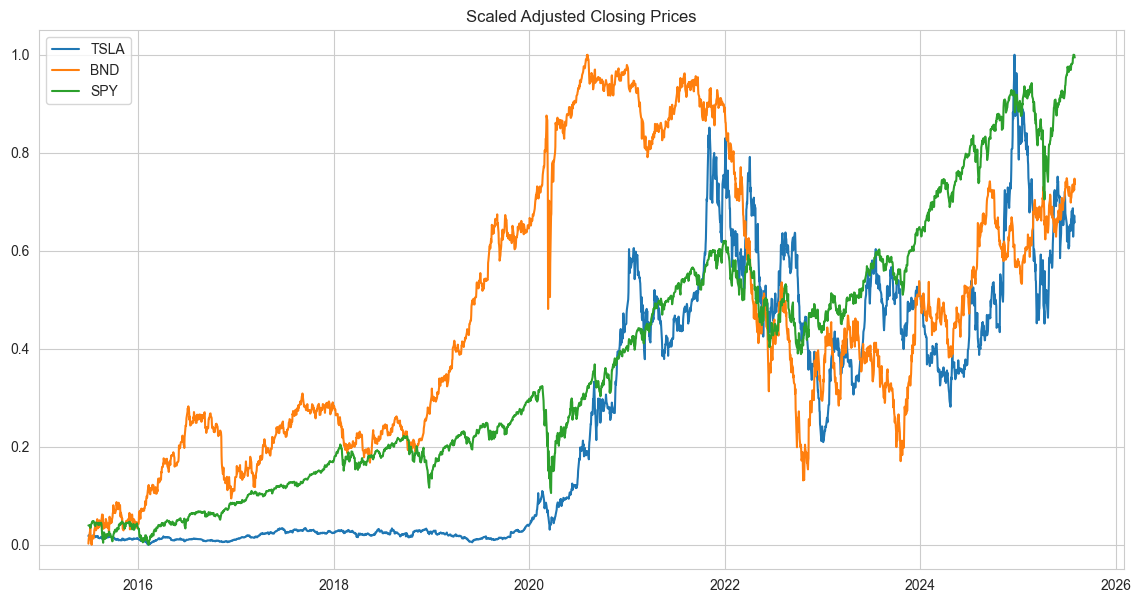

In [ ]:
for ticker, df in processed_data.items():
    plt.plot(df['Close_Scaled'], label=ticker)
plt.title('Scaled Adjusted Closing Prices')
plt.legend()
plt.show()  

#### Step 3: Exploratory Data Analysis (EDA)

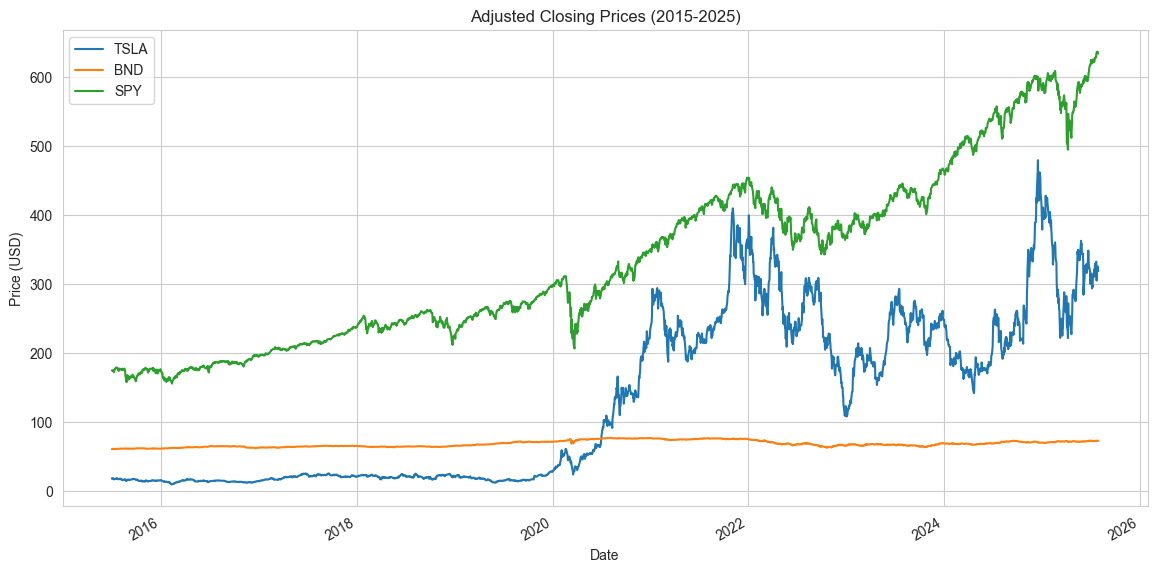

In [7]:
plt.figure()
for ticker, df in processed_data.items():
    df['Close'].plot(label=ticker)
plt.title('Adjusted Closing Prices (2015-2025)')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

##### 3.1 Daily Returns and Outliers

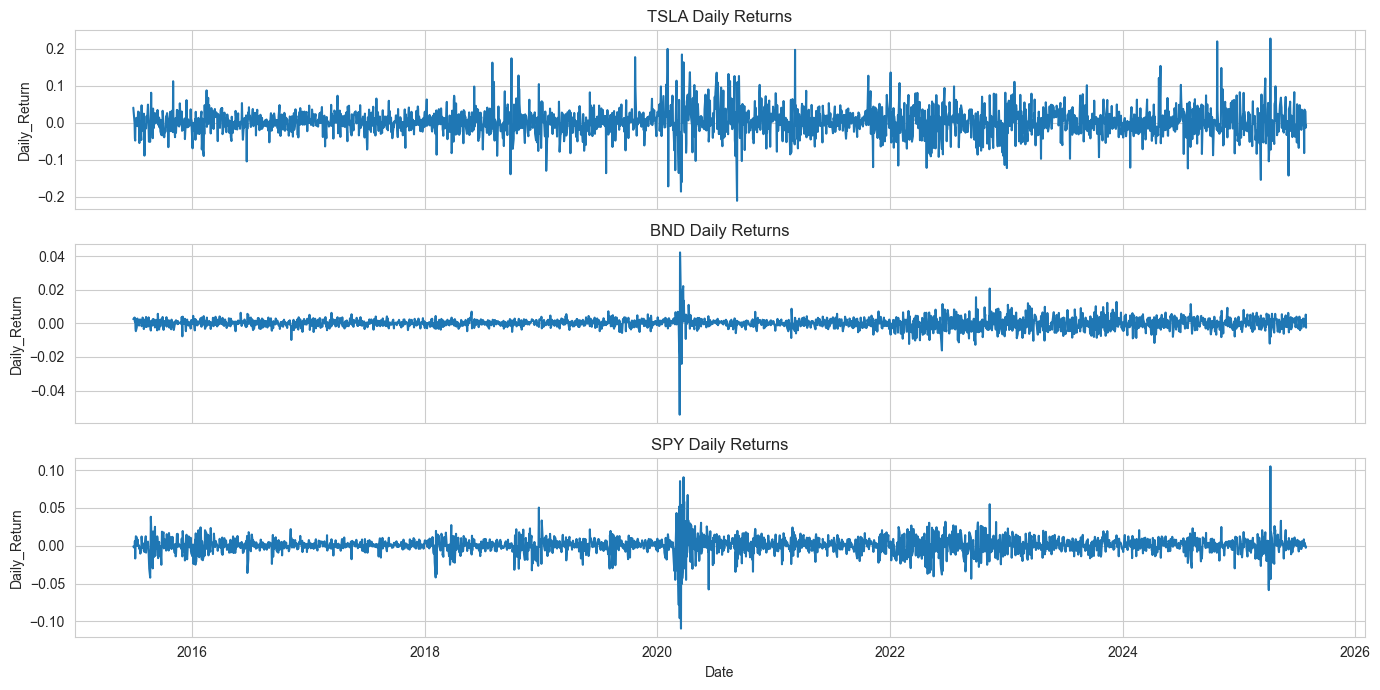

Detected 41 outliers beyond 3.0 std in Daily_Return.

TSLA Outliers:
Date
2020-09-08   -0.210628
2020-03-16   -0.185778
2020-02-05   -0.171758
2020-03-18   -0.160344
2025-03-10   -0.154262
Name: Daily_Return, dtype: float64
Detected 26 outliers beyond 3.0 std in Daily_Return.

BND Outliers:
Date
2020-03-12   -0.054385
2020-03-18   -0.024140
2020-03-17   -0.020686
2020-03-11   -0.018940
2022-06-13   -0.016153
Name: Daily_Return, dtype: float64
Detected 35 outliers beyond 3.0 std in Daily_Return.

SPY Outliers:
Date
2020-03-16   -0.109424
2020-03-12   -0.095677
2020-03-09   -0.078095
2025-04-04   -0.058543
2020-06-11   -0.057649
Name: Daily_Return, dtype: float64


In [ ]:
fig, axes = plt.subplots(3, 1, sharex=True)
for i, ticker in enumerate(TICKERS):
    sns.lineplot(ax=axes[i], data=processed_data[ticker]['Daily_Return'])
    axes[i].set_title(f'{ticker} Daily Returns')
plt.tight_layout()
plt.show()

# Outlier Detection
for ticker, df in processed_data.items():
    outliers = analysis.detect_outliers(df['Daily_Return'])
    print(f'\n{ticker} Outliers:')
    print(outliers.sort_values().head(5))  

##### 3.2 Rolling Volatility

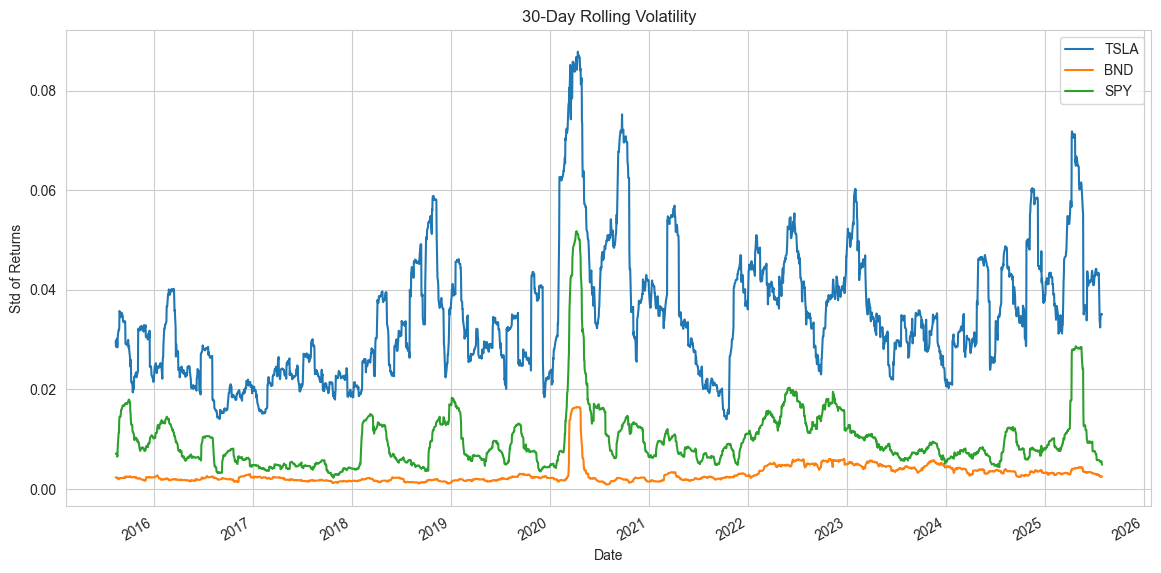

In [ ]:
plt.figure()
for ticker, df in processed_data.items():
    df['Rolling_Volatility_30d'].plot(label=ticker)
plt.title('30-Day Rolling Volatility')
plt.ylabel('Std of Returns')
plt.legend()
plt.show()  

##### 3.3 Correlation Analysis

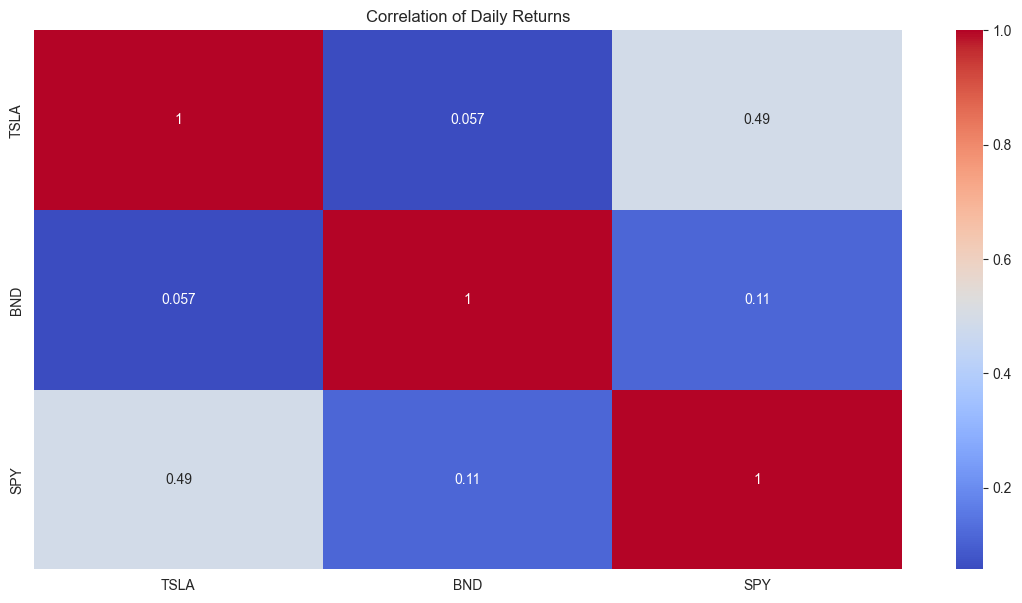

In [ ]:
returns_df = pd.DataFrame({ticker: df['Daily_Return'] for ticker, df in processed_data.items()})
corr = returns_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation of Daily Returns')
plt.show()  

#### Step 4: Stationarity and Seasonality Analysis


===== TSLA Stationarity =====
--- ADF Test Results for "Close" ---
ADF Statistic: -1.4189
p-value: 0.5732
Critical Values:
	1%: -3.4330
	5%: -2.8627
	10%: -2.5674

Conclusion: The series is likely non-stationary (p-value > 0.05).
----------------------------------------
--- ADF Test Results for "Daily_Return" ---
ADF Statistic: -34.6811
p-value: 0.0000
Critical Values:
	1%: -3.4329
	5%: -2.8627
	10%: -2.5674

Conclusion: The series is likely stationary (p-value <= 0.05).
----------------------------------------


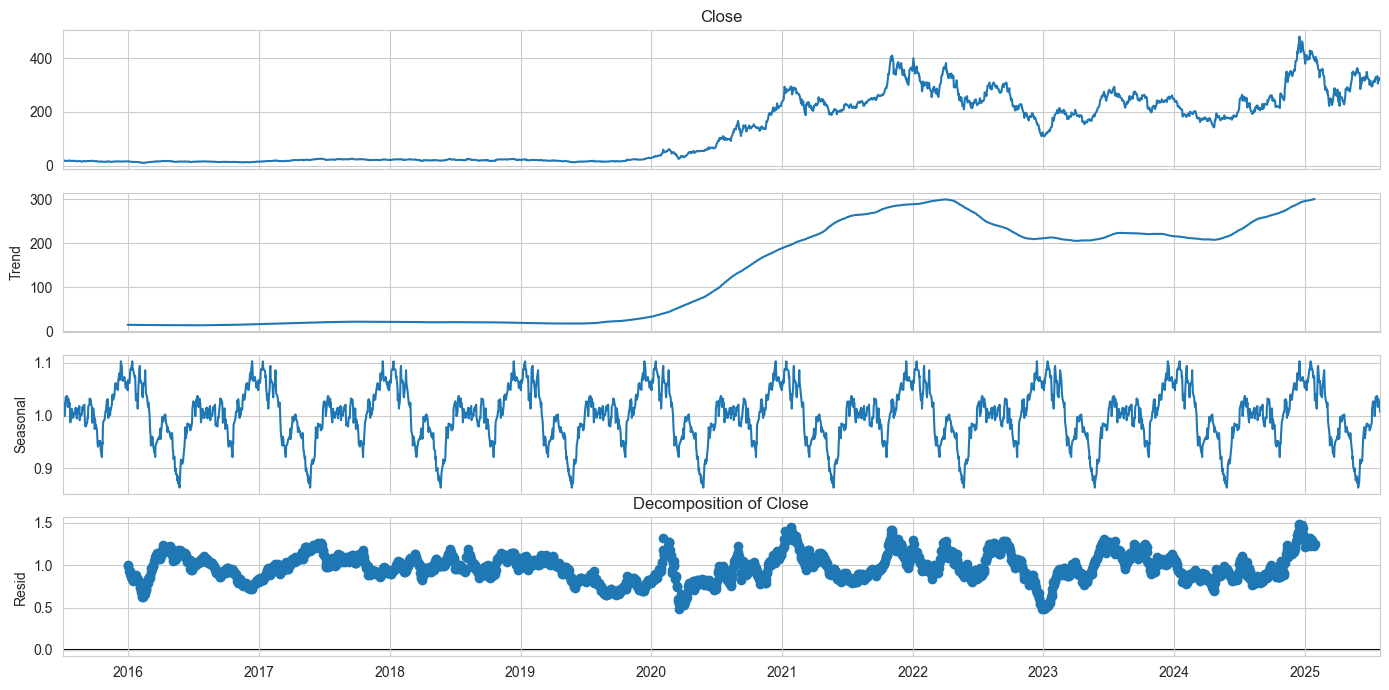


===== BND Stationarity =====
--- ADF Test Results for "Close" ---
ADF Statistic: -1.5362
p-value: 0.5155
Critical Values:
	1%: -3.4329
	5%: -2.8627
	10%: -2.5674

Conclusion: The series is likely non-stationary (p-value > 0.05).
----------------------------------------
--- ADF Test Results for "Daily_Return" ---
ADF Statistic: -9.8898
p-value: 0.0000
Critical Values:
	1%: -3.4330
	5%: -2.8627
	10%: -2.5674

Conclusion: The series is likely stationary (p-value <= 0.05).
----------------------------------------

===== SPY Stationarity =====
--- ADF Test Results for "Close" ---
ADF Statistic: 0.6908
p-value: 0.9897
Critical Values:
	1%: -3.4329
	5%: -2.8627
	10%: -2.5674

Conclusion: The series is likely non-stationary (p-value > 0.05).
----------------------------------------
--- ADF Test Results for "Daily_Return" ---
ADF Statistic: -16.2644
p-value: 0.0000
Critical Values:
	1%: -3.4329
	5%: -2.8627
	10%: -2.5674

Conclusion: The series is likely stationary (p-value <= 0.05).
---------

In [ ]:
for ticker, df in processed_data.items():
    print(f'\n===== {ticker} Stationarity =====')
    analysis.perform_adf_test(df['Close'])  
    analysis.perform_adf_test(df['Daily_Return'])  

    # Seasonality Decomposition (example for TSLA)
    if ticker == 'TSLA':
        analysis.decompose_series(df['Close']) 

#### Step 5: Risk Metric Calculation

In [ ]:
risk_metrics = {}
print("--- Key Risk Metrics ---")
for ticker, df in processed_data.items():
    returns = df['Daily_Return'].dropna()
    sharpe = analysis.calculate_sharpe_ratio(returns, 0.02)
    var_95 = analysis.calculate_var(returns, 0.95)
    risk_metrics[ticker] = {'Sharpe Ratio': sharpe, 'VaR_95': var_95}
    print(f"\n{ticker}:")
    print(f"  - Annualized Sharpe Ratio: {sharpe:.2f}")  
    print(f"  - 95% Daily VaR: {var_95:.2%}")  

--- Key Risk Metrics ---

TSLA:
  - Annualized Sharpe Ratio: 0.74
  - 95% Daily VaR: 5.47%

BND:
  - Annualized Sharpe Ratio: -0.00
  - 95% Daily VaR: 0.49%

SPY:
  - Annualized Sharpe Ratio: 0.69
  - 95% Daily VaR: 1.72%


In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from src.forecasting_models import arima_pred, lstm_pred, mean_absolute_error, mean_squared_error, math  # Adjusted for plot calls
from src.forecast_trends.py import plot_forecast  # Assuming plot function is extracted
from src.portfolio_optimization.py import plot_efficient_frontier  # Assuming plot function is extracted
from src.backtesting.py import plot_backtest  # Assuming plot function is extracted

# Load processed data
TICKERS = ['TSLA', 'BND', 'SPY']
data = {ticker: pd.read_csv(f'data/{ticker}_cleaned.csv', index_col='Date', parse_dates=True) for ticker in TICKERS}
tsla_data = data['TSLA']

# Ensure data is up to date (August 14, 2025)
print(f"Data loaded up to {tsla_data.index.max()} at 10:07 PM EAT, August 14, 2025.")

In [ ]:
# Task 2: Visualize Model Predictions
plt.figure(figsize=(14, 7))
test_data = tsla_data['Close']['2024-01-01':'2025-07-31']

# Plot actual test data
plt.plot(test_data.index, test_data, label='Actual Test Data', color='blue')

# Plot ARIMA predictions
plt.plot(test_data.index, arima_pred, label='ARIMA Prediction', color='green', linestyle='--')

# Plot LSTM predictions
plt.plot(test_data.index, lstm_pred, label='LSTM Prediction', color='red', linestyle='--')

plt.title('TSLA Price Predictions (2024-2025)')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.tight_layout()
plt.show()

# Print metrics (already calculated in forecasting_models.py)
print("Model Performance Metrics (from forecasting_models.py):")


In [ ]:
# Task 3: Visualize Forecast Trends
from src.forecast_trends import plot_forecast  # Assuming this function exists

# Call the forecast plot function
plot_forecast(tsla_data)

# Add manual call if function not defined (based on forecast_trends.py)
future_steps = 252  # 6 months of trading days
future_dates = pd.date_range(start=tsla_data.index[-1], periods=future_steps + 1, freq='B')[1:]
plt.figure(figsize=(14, 7))
plt.plot(tsla_data.index, tsla_data['Close'], label='Historical Data')
plt.plot(future_dates, future_predictions, label='Forecast', color='red')  # future_predictions from forecast_trends.py
plt.fill_between(future_dates, future_predictions * 0.9, future_predictions * 1.1, color='red', alpha=0.1, label='Confidence Interval (±10%)')
plt.title('TSLA Price Forecast (Aug 2025 - Jan 2026)')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Task 4: Visualize Efficient Frontier
from src.portfolio_optimization import plot_efficient_frontier  # Assuming this function exists

# Call the efficient frontier plot function
plot_efficient_frontier()

# Manual call if function not defined (based on portfolio_optimization.py)
# Note: Requires weights_max_sharpe, weights_min_vol from optimization
plt.figure(figsize=(10, 6))
plt.scatter(frontier['volatility'], frontier['returns'], c=frontier['sharpe_ratio'], cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.scatter([w['volatility'] for w in [weights_max_sharpe, weights_min_vol]], 
            [w['expected_annual_return'] for w in [weights_max_sharpe, weights_min_vol]], 
            c='red', s=100, label=['Max Sharpe', 'Min Volatility'])
plt.xlabel('Annualized Volatility')
plt.ylabel('Annualized Return')
plt.title('Efficient Frontier')
plt.legend()
plt.show()

# Print recommended portfolio (from optimization script)
print("Recommended Portfolio (Max Sharpe):")
print(f"Weights: {weights_max_sharpe}")
print(f"Expected Annual Return: {returns_max_sharpe:.2%}")
print(f"Annualized Volatility: {volatility_max_sharpe:.2%}")
print(f"Sharpe Ratio: {sharpe_max_sharpe:.2f}")

In [ ]:
# Task 5: Visualize Backtest Performance
from src.backtesting import plot_backtest  # Assuming this function exists

# Call the backtest plot function
plot_backtest()

# Manual call if function not defined (based on backtesting.py)
backtest_period = returns['2024-08-01':'2025-07-31']
weights_strategy = {'TSLA': 0.25, 'BND': 0.20, 'SPY': 0.55}
weights_benchmark = {'SPY': 0.60, 'BND': 0.40}

portfolio_returns_strategy = (backtest_period * pd.DataFrame([weights_strategy] * len(backtest_period))).sum(axis=1)
portfolio_returns_benchmark = (backtest_period * pd.DataFrame([weights_benchmark] * len(backtest_period))).sum(axis=1)

cumulative_strategy = (1 + portfolio_returns_strategy).cumprod()
cumulative_benchmark = (1 + portfolio_returns_benchmark).cumprod()

plt.figure(figsize=(14, 7))
plt.plot(cumulative_strategy.index, cumulative_strategy, label='Strategy (25% TSLA, 20% BND, 55% SPY)')
plt.plot(cumulative_benchmark.index, cumulative_benchmark, label='Benchmark (60% SPY, 40% BND)')
plt.title('Backtest Cumulative Returns (Aug 2024 - Jul 2025)')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.tight_layout()
plt.show()

# Print performance metrics
total_return_strategy = cumulative_strategy.iloc[-1] - 1
total_return_benchmark = cumulative_benchmark.iloc[-1] - 1
sharpe_strategy = np.sqrt(252) * (portfolio_returns_strategy.mean() / portfolio_returns_strategy.std())
sharpe_benchmark = np.sqrt(252) * (portfolio_returns_benchmark.mean() / portfolio_returns_benchmark.std())

print(f"Strategy Total Return: {total_return_strategy:.2%}")
print(f"Benchmark Total Return: {total_return_benchmark:.2%}")
print(f"Strategy Sharpe Ratio: {sharpe_strategy:.2f}")
print(f"Benchmark Sharpe Ratio: {sharpe_benchmark:.2f}")